In [1]:
import os
import yaml
import torch
from matplotlib import pyplot as plt
%matplotlib inline

from adni_3d import ADNI_3D

dir_to_scans = '../data/SUBSET_OF_DATA_PROCESSED/subjects/'
dir_to_tsv = '../splits'
percentage_usage=1.0
num_labels=3
train_dataset = ADNI_3D(dir_to_scans, dir_to_tsv, mode = 'Train', 
    n_label = num_labels, percentage_usage=percentage_usage)

batch_size=1
num_workers=1
train_loader = torch.utils.data.DataLoader(
        train_dataset, batch_size=batch_size, shuffle=True,
        num_workers=num_workers, pin_memory=True, drop_last=True)


Dataset created in ../data/roi/schaefer_2018



 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


In [3]:
img = train_dataset[0][0]
img.shape

(1, 96, 96, 96)

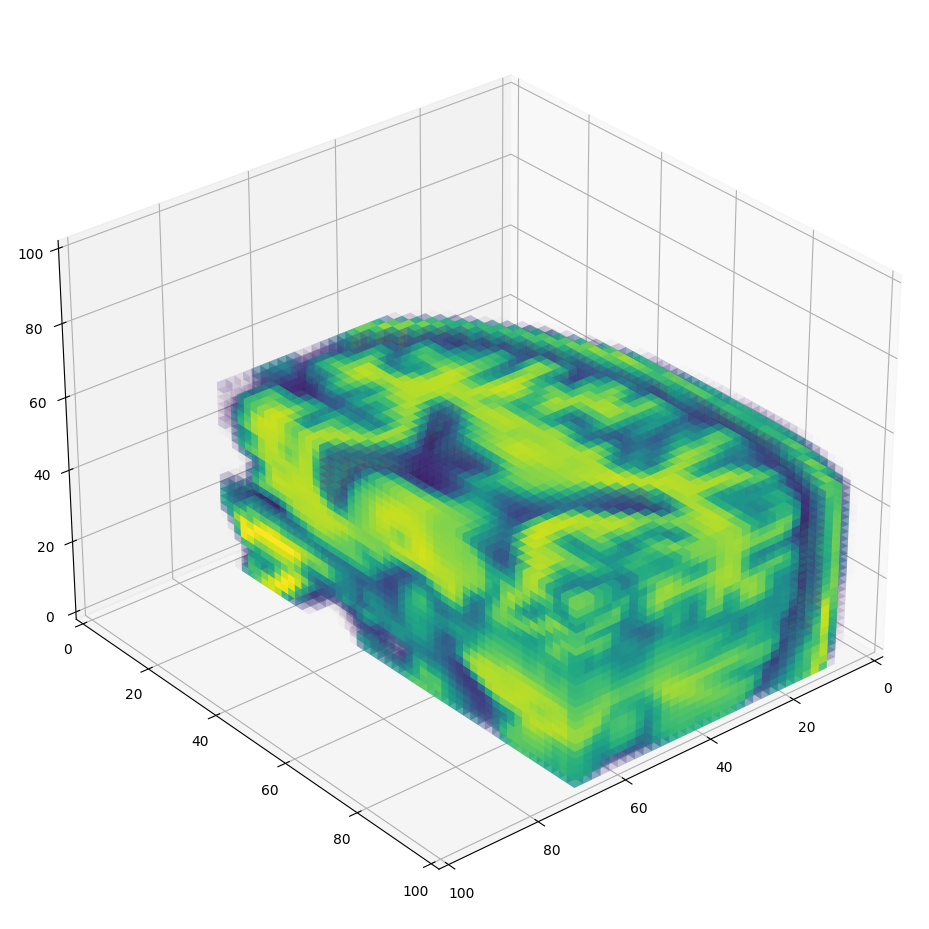

In [4]:
from visualization_aid import preprocess_for_plot3d, plot_cube

IMG_DIM=50

resized = preprocess_for_plot3d(img, IMG_DIM)
plot_cube(resized[:35,::-1,:25], IMG_DIM)

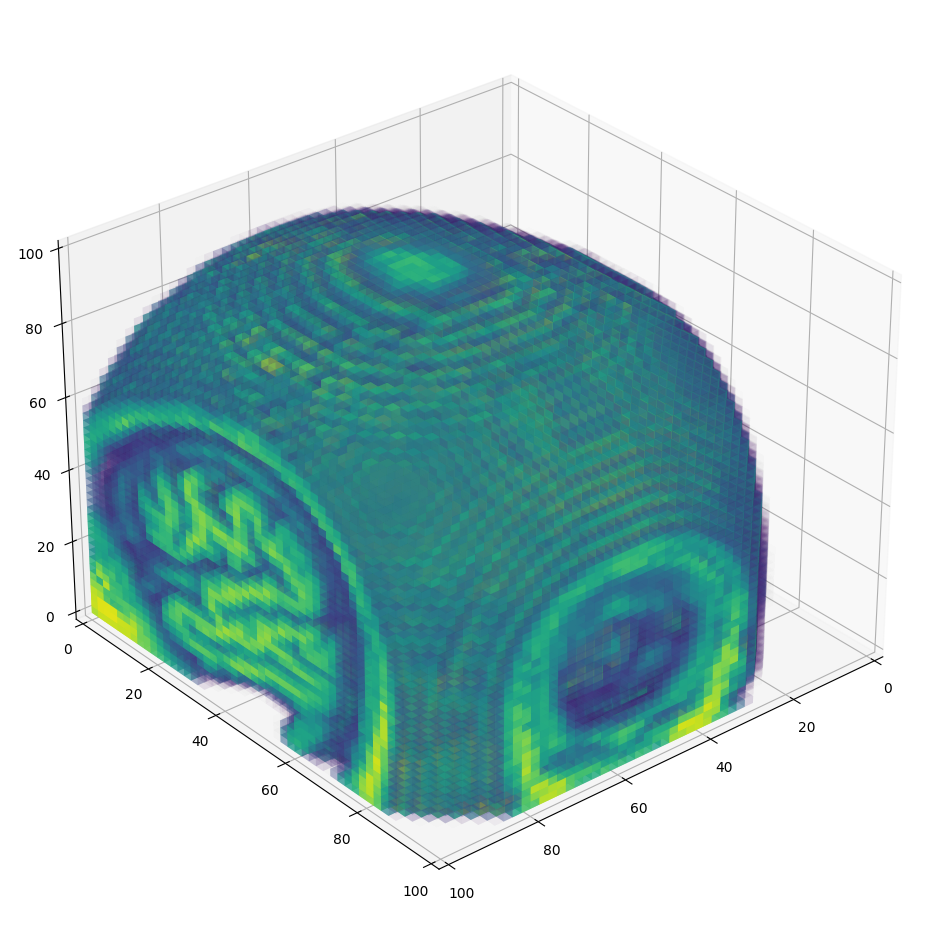

In [5]:
plot_cube(resized[:,::-1,:], IMG_DIM)

[]

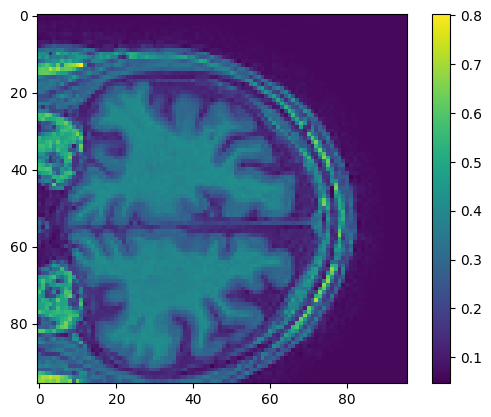

In [7]:
plt.imshow(img[:,:,95].squeeze())
plt.colorbar()
plt.plot()

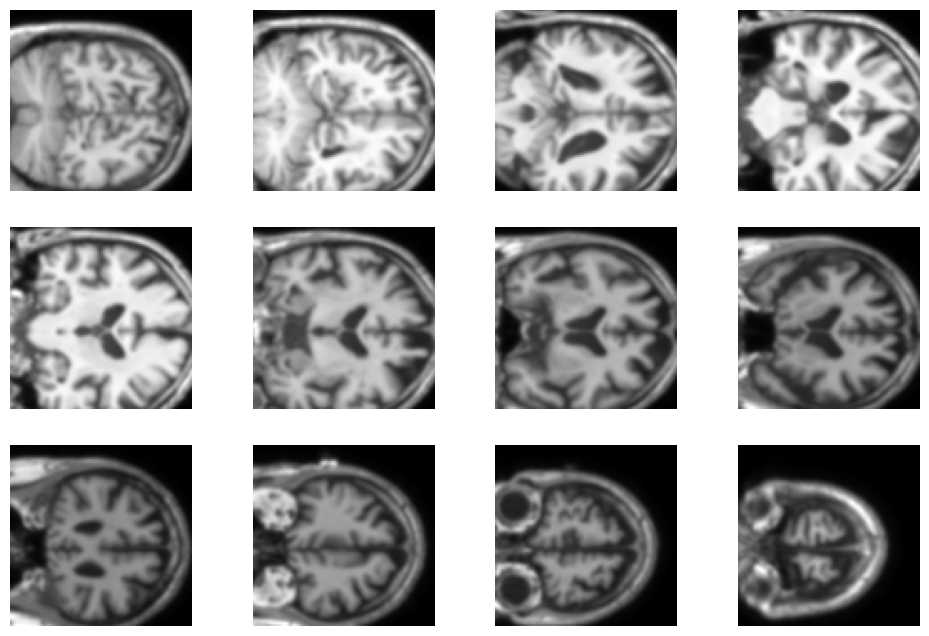

In [34]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

rows, cols = 3, 4
fig, ax = plt.subplots(nrows=rows, ncols=cols)

selections = list(range(0, img.shape[2], int(img.shape[2]/(rows*cols))))
options = []
x = 0
for j in range(rows):
    for i in range(cols):
        options.append((selections[x], j, i))
        x += 1
        
# print(options)

for s, i, j in options:
    ax[i][j].axis('off')
    ax[i][j].imshow(img[:,:,s].squeeze(), cmap='gray')

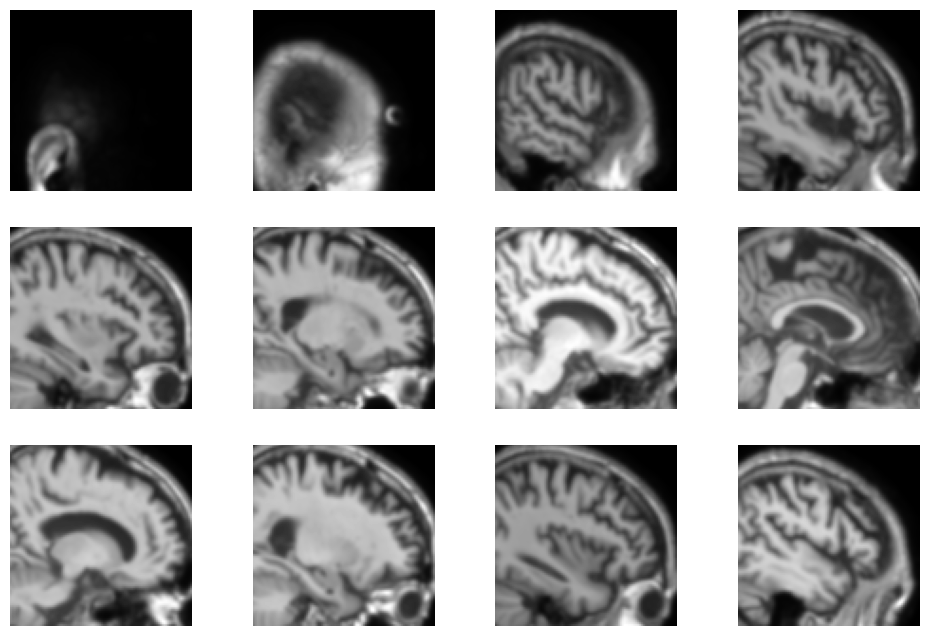

In [35]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
# print(img.shape)
img_proc = torch.tensor(img.squeeze()).rot90(k=1, dims=[0,2])
# print(img_proc.shape)
rows, cols = 3, 4
fig, ax = plt.subplots(nrows=rows, ncols=cols)

selections = list(range(0, img.shape[2], int(img_proc.shape[2]/(rows*cols))))
options = []
x = 0
for j in range(rows):
    for i in range(cols):
        options.append((selections[x], j, i))
        x += 1
        
# print(options)

for s, i, j in options:
    ax[i][j].axis('off')
    ax[i][j].imshow(img_proc[:,:,s].squeeze(), cmap='gray')

[]

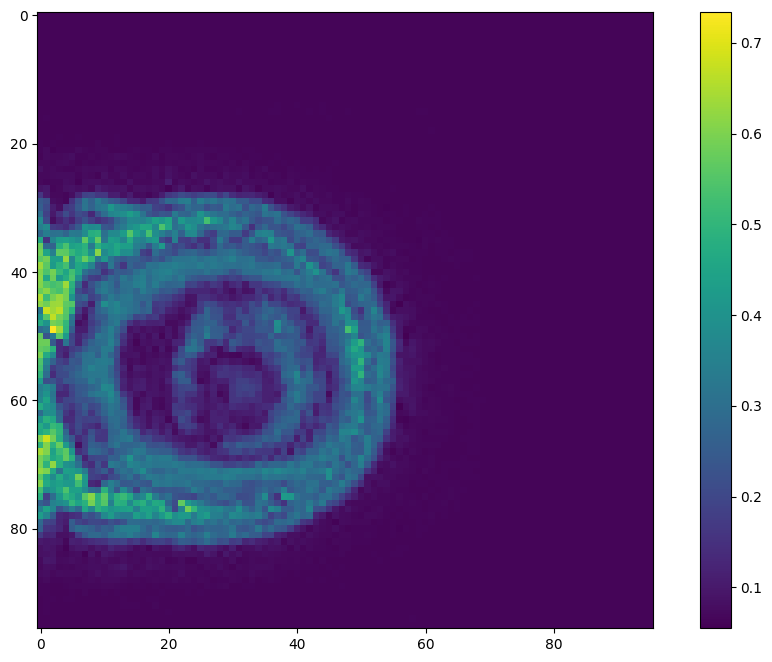

In [27]:
plt.imshow(img[:,:,0].squeeze())
plt.colorbar()
plt.plot()